# <font color='gold'> San Francisco Airport

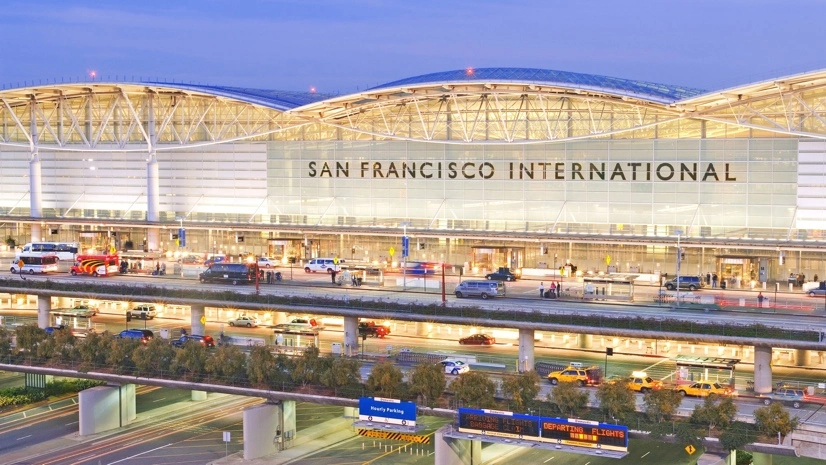

## <font color='gold'>Project Aim

The primary goal of this project is to analyze and cluster passenger activity data from **San Francisco International Airport (SFO)** to uncover meaningful patterns and insights. 

By leveraging clustering techniques, the project seeks to:
- Categorize operational activities, such as passenger flow (**enplaned**, **deplaned**, or **transit**),
- Analyze airline operations and terminal usage,
- Identify trends across different terminals and boarding areas.

## <font color='gold'> Dataset Column Descriptions

| Column Name                 | Description                                                                                     | Example                |
|-----------------------------|-------------------------------------------------------------------------------------------------|------------------------|
| **Activity Period**         | The time period of the activity in **YYYYMM** format.                                          | `200507` (July 2005)  |
| **Operating Airline**       | The name of the airline operating the flight or activity.                                      | `ATA Airlines`        |
| **Operating Airline IATA Code** | The IATA (International Air Transport Association) code for the operating airline.             | `TZ`, `AC`            |
| **Published Airline**       | The airline under which the flight or activity is marketed or published.                      | `Air Canada`          |
| **Published Airline IATA Code** | The IATA code for the published airline.                                                     | `AC`                  |
| **GEO Summary**             | Indicates whether the activity is **Domestic** or **International**.                          | `Domestic`, `International` |
| **GEO Region**              | Specifies the geographical region associated with the flight or activity.                     | `US`, `Canada`        |
| **Activity Type Code**      | Describes the type of passenger activity: `Deplaned`, `Enplaned`, or `Thru / Transit`.        | `Deplaned`            |
| **Price Category Code**     | Indicates the fare category of the flight or activity.                                        | `Low Fare`, `Other`   |
| **Terminal**                | Specifies the terminal at the airport where the activity occurred.                            | `Terminal 1`          |
| **Boarding Area**           | Represents the boarding area within the specified terminal.                                   | `B`                   |
| **Passenger Count**         | The number of passengers associated with the activity.                                        | `27271`               |


# <font color='gold'> Requirements

In [133]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
warnings.filterwarnings('ignore')

## <font color='gold'> Import Data

In [5]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

## <font color='gold'> EDA (Exploratory Data Analysis)

In [7]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [8]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [9]:
df.shape

(18885, 12)

In [10]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
2414,200704,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Enplaned,Low Fare,Terminal 1,B,6748
7554,201011,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Thru / Transit,Other,International,G,470
9759,201207,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,3173
9874,201207,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,3182
3494,200801,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Deplaned,Other,International,G,6541


In [11]:
df['Activity Period'].nunique()

156

In [12]:
df['GEO Summary'].value_counts()

GEO Summary
International    11904
Domestic          6981
Name: count, dtype: int64

In [13]:
df['Activity Type Code'].value_counts()

Activity Type Code
Enplaned          8930
Deplaned          8909
Thru / Transit    1046
Name: count, dtype: int64

In [14]:
df['Price Category Code'].value_counts()

Price Category Code
Other       16521
Low Fare     2364
Name: count, dtype: int64

In [15]:
df['Terminal'].value_counts()

Terminal
International    11963
Terminal 1        3610
Terminal 3        2699
Terminal 2         586
Other               27
Name: count, dtype: int64

In [16]:
df[df['GEO Summary']=='Domestic'].head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
11,200507,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Deplaned,Low Fare,International,A,8055
12,200507,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Enplaned,Low Fare,International,A,7984


In [17]:
df['Operating Airline'].unique()

array(['ATA Airlines', 'Air Canada', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas Air

In [18]:
df.groupby(df['Operating Airline IATA Code'])['Operating Airline'].first()

Operating Airline IATA Code
4O    ABC Aerolineas S.A. de C.V. dba Interjet
4T                             BelAir Airlines
5Y                              Atlas Air, Inc
9W                                 Jet Airways
A8                                 Ameriflight
                        ...                   
XJ                             Mesaba Airlines
XP                                Xtra Airways
Y4                            Volaris Airlines
YV                               Mesa Airlines
YX                            Midwest Airlines
Name: Operating Airline, Length: 82, dtype: object

In [19]:
df[df['Operating Airline IATA Code'].isnull()].head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18
6809,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73
6810,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73
6920,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160
6921,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160


In [20]:
df[df['Operating Airline']=='Boeing Company']

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18


In [21]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


## <font color='gold'> Modelling

In [40]:
x=df.drop(['Activity Period','Operating Airline IATA Code','Published Airline IATA Code'],axis=1)

In [44]:
x.head()

,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [46]:
x=pd.get_dummies(x,drop_first=True)

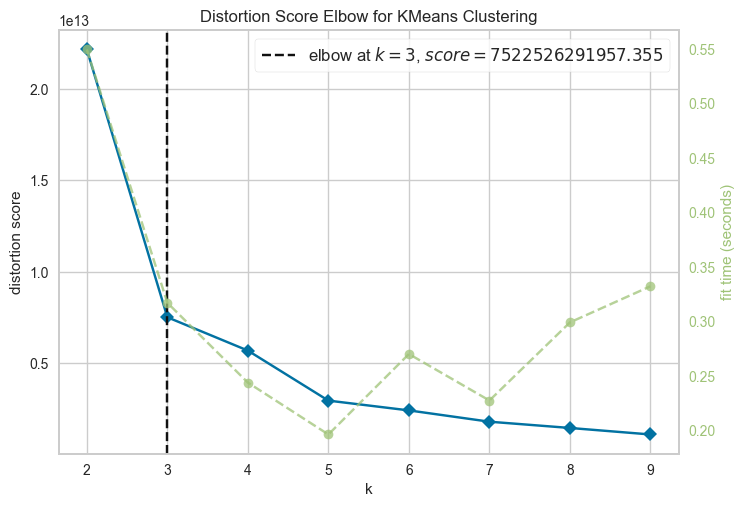

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(x) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [49]:
model=KMeans(3) 
model=model.fit(x)
predictions=model.predict(x)

In [62]:
silhouette_score(x,predictions)

0.828598122508645

In [56]:
df['cluster']=predictions

In [123]:
df['cluster'].value_counts()

cluster
0    16492
2     1968
1      425
Name: count, dtype: int64

In [58]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,cluster
5491,200906,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,12823,0
2012,200612,Northwest Airlines,NW,Northwest Airlines,NW,Domestic,US,Enplaned,Other,Terminal 1,C,48080,0
15643,201608,United Airlines,UA,United Airlines,UA,Domestic,US,Thru / Transit,Other,International,G,851,0
2944,200708,SkyWest Airlines,OO,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,5255,0
10474,201301,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Other,International,A,8615,0


## <font color='gold'> Modelling Visualizations

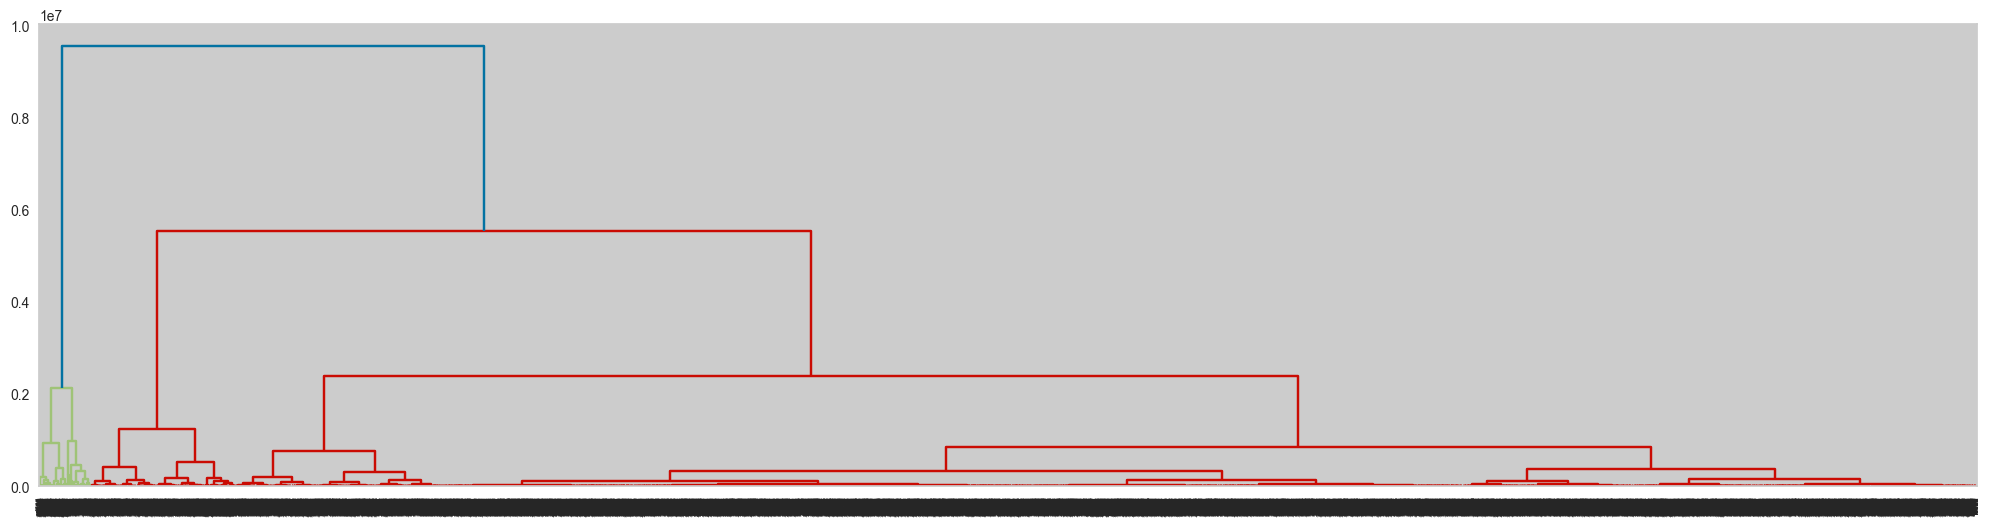

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
data=linkage(x,method='ward',metric='euclidean')
plt.figure(figsize=(25,6))
dendrogram(data);

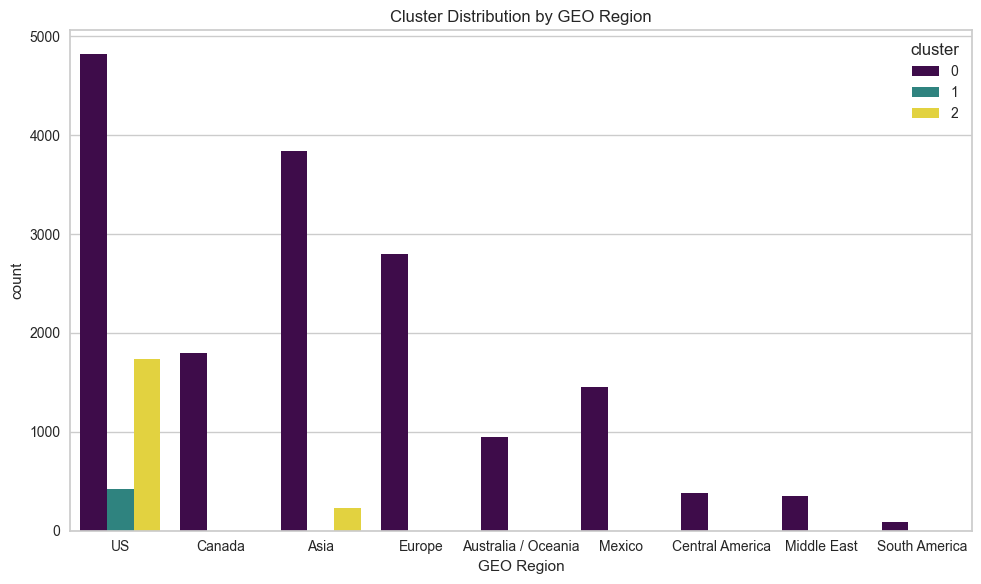

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GEO Region', hue='cluster',palette='viridis')
plt.title('Cluster Distribution by GEO Region')
plt.tight_layout()
plt.show()

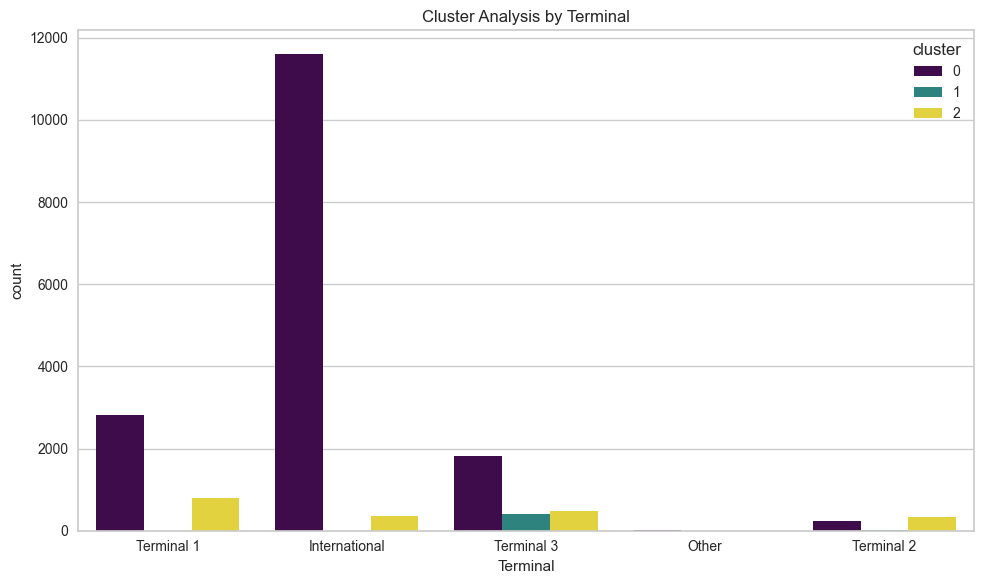

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Terminal', hue='cluster',palette='viridis')
plt.title('Cluster Analysis by Terminal')
plt.tight_layout()
plt.show()

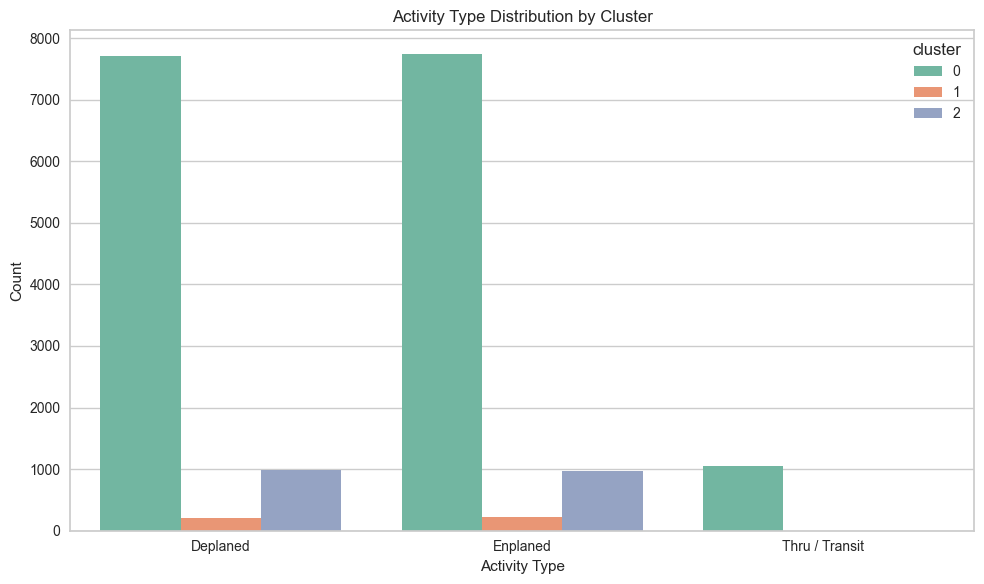

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Activity Type Code", hue="cluster", palette="Set2")
plt.title("Activity Type Distribution by Cluster")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

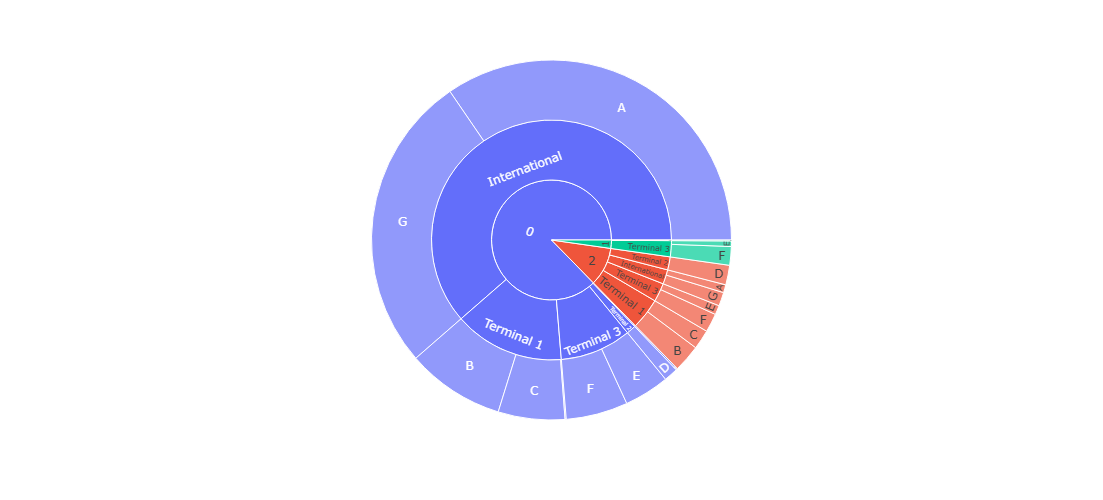

In [135]:
fig=px.sunburst(df,path=['cluster','Terminal','Boarding Area'])
fig.update_layout(width=700, height=500)
fig.show()

## <font color='gold'> Conclusion

The clustering analysis of passenger activity data at **San Francisco International Airport (SFO)** yielded a robust model, as indicated by a silhouette score of **0.8286**. This high score reflects well-defined and compact clusters with clear separation, demonstrating the effectiveness of the clustering methodology employed. 

The insights derived from these clusters provide a deeper understanding of passenger flow patterns, terminal usage, and airline operations. These findings can be leveraged to optimize airport resources, streamline operations, and enhance the passenger experience. Overall, the clustering approach proves to be a valuable tool for uncovering actionable insights and supporting data-driven decision-making at SFO.